<h2><b>logistic regrission</b></h2>

In [118]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

In [119]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [120]:
dta = sm.datasets.fair.load_pandas().data

In [121]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [122]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [123]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [124]:
dta.shape

(6366, 9)

In [125]:
dta['affairs'] = (dta.affairs>0).astype(int)

In [126]:
print(dta['affairs'].value_counts())

0    4313
1    2053
Name: affairs, dtype: int64


In [127]:
dta.head(30)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1


In [128]:
'''sns.pairplot(dta, hue = 'affairs')
plt.plot()'''

"sns.pairplot(dta, hue = 'affairs')\nplt.plot()"

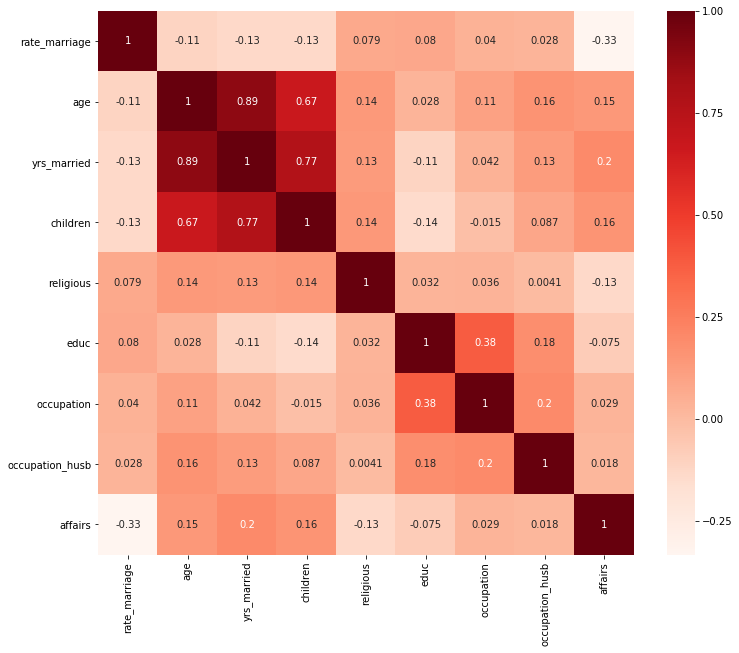

In [129]:
plt.figure(figsize=(12,10))
cor = dta.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [130]:
dta.drop('yrs_married',axis=1,inplace=True)
#dta = dta.iloc[np.random.permutation(len(dta))]

In [131]:
y = dta.affairs 
x = dta.drop('affairs',axis=1)

[]

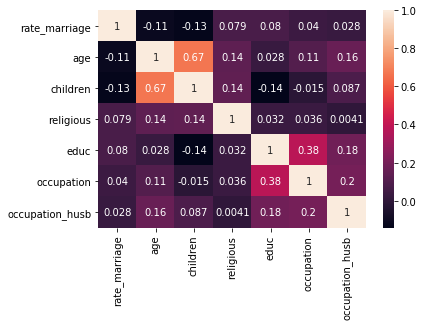

In [132]:
xa = x.corr()
sns.heatmap(xa,annot=True)
plt.plot()

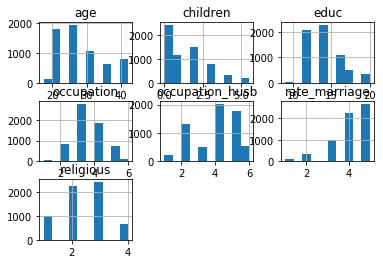

In [133]:
# Univariate Histograms
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

x.hist()
plt.show()# Univariate Histograms


In [134]:
x.describe()

,rate_marriage,age,children,religious,educ,occupation,occupation_husb
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,1.396874,2.426170,14.209865,3.424128,3.850141
std,0.961430,6.847882,1.433471,0.878369,2.178003,0.942399,1.346435
min,1.000000,17.500000,0.000000,1.000000,9.000000,1.000000,1.000000
25%,4.000000,22.000000,0.000000,2.000000,12.000000,3.000000,3.000000
50%,4.000000,27.000000,1.000000,2.000000,14.000000,3.000000,4.000000
75%,5.000000,32.000000,2.000000,3.000000,16.000000,4.000000,5.000000
max,5.000000,42.000000,5.500000,4.000000,20.000000,6.000000,6.000000


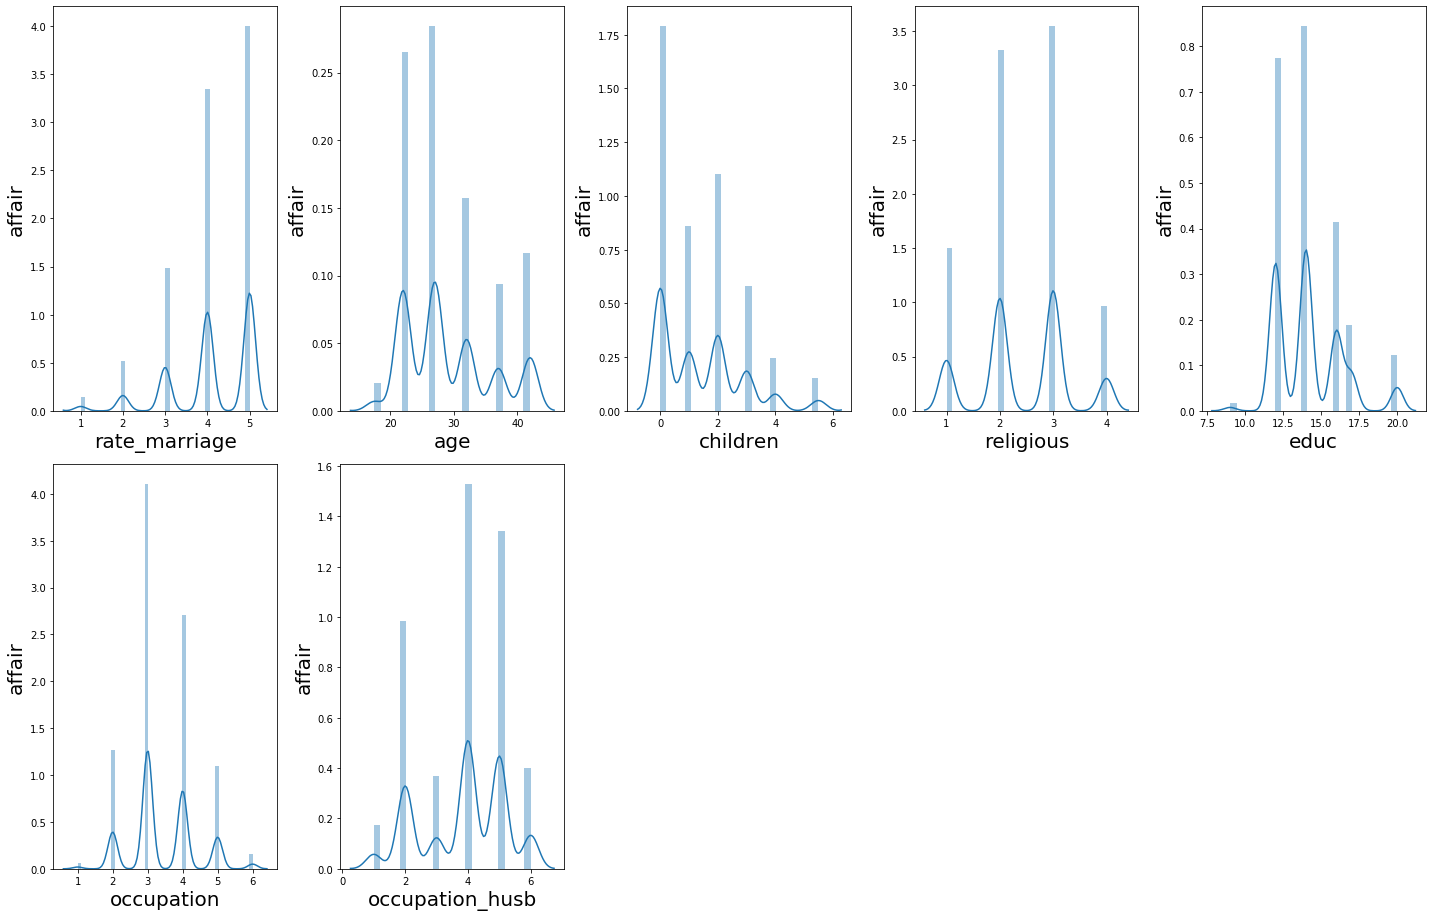

In [135]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x.columns:
    if plotnumber<=15 :
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('affair',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [136]:
#x.iloc[np.random.permutation(len(x))]

In [137]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)

In [138]:
#dta.corr(method ='pearson')
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = x.columns

In [139]:
vif

,VIF,Features
0,1.034432,rate_marriage
1,1.934505,age
2,1.945969,children
3,1.036904,religious
4,1.237633,educ
5,1.206647,occupation
6,1.082696,occupation_husb


In [140]:
pt = PowerTransformer(method='yeo-johnson')
data_gauss = pt.fit_transform(X_scaled)

In [141]:
x_train,x_test,y_train,y_test = train_test_split(data_gauss,y,test_size=0.35,random_state=43)

In [159]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score
lg = LogisticRegression(C=4.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


lg.fit(x_train,y_train)
score = lg.score(x_test, y_test)
print('score',score)
mm = lg.predict(x_test)

d = metrics.accuracy_score(y_test,mm)
print('accuracy_score',d)
print('\nconfusion_matrix')
print(confusion_matrix(y_test,mm))
i=3
print('\n actual value',y.iloc[i])
print('\npredict value',lg.predict(x.iloc[[i]]))
print('\npredict_proba',lg.predict_proba(x.iloc[[i]]))
print('\npredict_log_proba',lg.predict_log_proba(x.iloc[[i]]))


score 0.7303723642889188
accuracy_score 0.7303723642889188

confusion_matrix
[[1356  159]
 [ 442  272]]

 actual value 1

predict value [1]

predict_proba [[0.2567459 0.7432541]]

predict_log_proba [[-1.3596684 -0.2967173]]


In [151]:
print('precision_score',precision_score(y_test,mm))

print('\nrecall_score',recall_score(y_test,mm))

precision_score 0.6310904872389791

recall_score 0.38095238095238093


In [27]:
lg.predict(x.iloc[[20]])

array([0])

<b>new type <br> data upsampled</b> 

In [28]:
from sklearn.utils import resample
one = dta[dta['affairs'] == 1 ]
zer = dta[dta['affairs'] == 0 ]

In [29]:
one_upsa = resample(one,replace=True,n_samples=len(zer),random_state=42)
#one_dwsa = resample(zer,replace=True,n_samples=len(one),random_state=42)

In [30]:
#one_dwsa.columns
one_upsa.columns

Index(['rate_marriage', 'age', 'children', 'religious', 'educ', 'occupation',
       'occupation_husb', 'affairs'],
      dtype='object')

In [31]:
xup = pd.concat([one_upsa,zer])
#xdw = pd.concat([one_dwsa,one])

In [32]:
#xdw.affairs.value_counts()
xup.affairs.value_counts()

1    4313
0    4313
Name: affairs, dtype: int64

In [35]:
xap = xup.drop('affairs',axis=1)
yap = xup.affairs
#ydw = xdw.affairs
#xdw = xdw.drop('affairs',axis=1)


In [36]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(xap)

#X_scaled = scaler.fit_transform(xdw)

In [38]:
pt = PowerTransformer(method='yeo-johnson')
data_gauss = pt.fit_transform(X_scaled)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,yap,test_size=0.30,random_state=43)
#x_train,x_test,y_train,y_test = train_test_split(X_scaled,ydw,test_size=0.30,random_state=43)
#{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, 

In [114]:
lg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga',  tol=0.003, verbose=0,
                   warm_start=False)
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.003, verbose=0,
                   warm_start=False)

In [115]:
score = lg.score(x_test, y_test)
print('score',score)
mm = lg.predict(x_test)

d = metrics.accuracy_score(y_test,mm)
print('accuracy_score',d)
print('\nconfusion_matrix')
print(confusion_matrix(y_test,mm))
print('\npredict_proba',lg.predict_proba(x.iloc[[20]]))
print('\npredict_log_proba',lg.predict_log_proba(x.iloc[[0]]))

score 0.6700154559505409
accuracy_score 0.6700154559505409

confusion_matrix
[[947 371]
 [483 787]]

predict_proba [[0.71015849 0.28984151]]

predict_log_proba [[-2.46548278 -0.08879604]]


In [116]:
print('precision_score',precision_score(y_test,mm))

print('\nrecall_score',recall_score(y_test,mm))

precision_score 0.6796200345423143

recall_score 0.6196850393700788
